# Team 1 -  SA4110 - CA Project

<h3> This document contains the code as well as brief descirptions of the experiments to develop and improve model accuracy as part of the Image Classifier (CNN) CA assignment. This report also contains relevant plots to summarize the details of the experiments and their impacts on model accuracy. </h3>

### Project Configuration

<p> Downloading of standard libraries and setting up directory paths </p>

In [1]:
# Import relevant libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, AveragePooling2D

In [2]:
# Data Configuration
TRAIN_DIR = os.path.join(os.getcwd(), 'ml_data/train')
TEST_DIR = os.path.join(os.getcwd(), 'ml_data/test')

In [3]:
# Image configuration
# As the image sizes in the dataset are not standardized, we need to define a fixed size to re-size all samples
IMG_SIZE= 28
NUM_CHANNEL = 3 # channel set to 3 to convert to RGB

### Data preparation

<p> Methods to perform manual one-hot encoding (OHE) for image labels and preparing training and test datasets </p>

In [4]:
'''
Set image label based on type
'''
def label_img(img):
    type = img.split('_')[0]
    label = switch(type)
    return label

'''
OHE classification based on image type
'''
def switch(label):
    if label == 'apple':
        y_onehot = [1,0,0,0]
    elif label == 'banana':
        y_onehot = [0,1,0,0]
    elif label == 'orange':
        y_onehot = [0,0,1,0]
    elif label == 'mixed':
        y_onehot = [0,0,0,1]
    return y_onehot

'''
Reverse the OHE classification
'''
def switch_back(y_onehot):
    if (y_onehot & np.array([1,0,0,0])).any():
        label = 'apple'
    elif (y_onehot & np.array([0,1,0,0])).any():
        label = 'banana'
    elif (y_onehot & np.array([0,0,1,0])).any():
        label = 'orange'
    elif (y_onehot & np.array([0,0,0,1])).any():
        label = 'mixed'
    return label

'''
Change the OHE classification to integer value of index containing '1'
'''
def switch_to_int(y_onehot):
    for i in range(len(y_onehot)):
        if y_onehot[i] == 1:
            return i
        else:
            continue
    return None
    

In [5]:
'''
Re-shape X data to specific format
'''
def reshape(x):
    return np.reshape(x, (-1, IMG_SIZE, IMG_SIZE, NUM_CHANNEL))


In [6]:
'''
Prepare dataset
'''
def prep_data(path):
    
    y = [] # list to hold one-hot-encoded label
    
    for img in os.listdir(path): # loop through each image file in directory
        
        if img[0] == '.':   # skip hidden files
            continue
    
        y_ohe = label_img(img) # get the ohe label for the image

        # resize and convert to RGB
        img = np.array(Image.open('{}/{}'.format(path, img)).convert('RGB').resize([IMG_SIZE, IMG_SIZE]))

        # append label and image to lists
        try:
            x = np.concatenate((x, img))
        except:
            x = img
        
        y.append(y_ohe) 
    
    x = reshape(x) # reshape x array to required format (size, size, channel)
    y = np.array([i for i in y])  
    
    return x , y 

### Baseline model
<p> This will be the initial model used for training and evaluating the results. <br/>
Any new iterations will utilize this model as the baseline </p>

In [7]:
# Model Configuration
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, NUM_CHANNEL)
NO_CLASSES = 4
NO_EPOCHS = 25
VERBOSITY = 1 # display all outputs
OPTIMIZER = 'adam'
LOSS_FUNCTION = 'categorical_crossentropy'

In [8]:
'''
Model creation
'''
def prep_base_model():
    
    model = tf.keras.Sequential() 

    model.add(Conv2D(20, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(IMG_SHAPE), padding='same'))
    model.add(AveragePooling2D(pool_size=(2,2)))
    model.add(Conv2D(40, kernel_size=(3,3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(NO_CLASSES, activation='softmax'))
    model.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=['accuracy'])
    return model

In [9]:
'''
Plot loss and accuracy per epoch.
'''
def plot_history(history):
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 6))
  
  ax[0].plot(history.history['loss'])
  ax[0].plot(history.history['val_loss'])
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('Loss')
  ax[0].set_title('Loss Curve')
  ax[0].legend(['Train','Validation'])
  
  ax[1].plot(history.history['accuracy'])
  ax[1].plot(history.history['val_accuracy'])
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('Accuracy')
  ax[1].set_title('Accuracy Curve')
  ax[1].legend(['Train','Validation'])

  fig.tight_layout()
  plt.show()    

## First iteration - Baseline Model

In [10]:
# fetch training and test data and OHE labels
X_train, y_train = prep_data(TRAIN_DIR)
X_test, y_test = prep_data(TEST_DIR)
X_train = X_train/255
X_test = X_test/255

c:\Python38\lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [11]:
# split training data to get training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [12]:
# create model
baseline_model = prep_base_model()
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 20)        560       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 20)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 40)        7240      
                                                                 
 flatten (Flatten)           (None, 5760)              0         
                                                                 
 dense (Dense)               (None, 100)               576100    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                        

In [13]:
# fit model with training and validation
baseline_history = baseline_model.fit(x=X_train, y=y_train,
                                      validation_data= (X_val, y_val),
                                      shuffle=True, epochs=NO_EPOCHS, verbose=VERBOSITY)

Epoch 1/25
6/6 [==============================] - 1s 44ms/step - loss: 1.4241 - accuracy: 0.2932 - val_loss: 1.1998 - val_accuracy: 0.3542
Epoch 2/25
6/6 [==============================] - 0s 17ms/step - loss: 1.1217 - accuracy: 0.5445 - val_loss: 1.0586 - val_accuracy: 0.5000
Epoch 3/25
6/6 [==============================] - 0s 18ms/step - loss: 0.9248 - accuracy: 0.6387 - val_loss: 0.7556 - val_accuracy: 0.8125
Epoch 4/25
6/6 [==============================] - 0s 18ms/step - loss: 0.6986 - accuracy: 0.8010 - val_loss: 0.6079 - val_accuracy: 0.8125
Epoch 5/25
6/6 [==============================] - 0s 20ms/step - loss: 0.5945 - accuracy: 0.8115 - val_loss: 0.5044 - val_accuracy: 0.8125
Epoch 6/25
6/6 [==============================] - 0s 18ms/step - loss: 0.5066 - accuracy: 0.8063 - val_loss: 0.4810 - val_accuracy: 0.8125
Epoch 7/25
6/6 [==============================] - 0s 18ms/step - loss: 0.4686 - accuracy: 0.8220 - val_loss: 0.4598 - val_accuracy: 0.8333
Epoch 8/25
6/6 [===========

Accuracy and Loss for Baseline Model


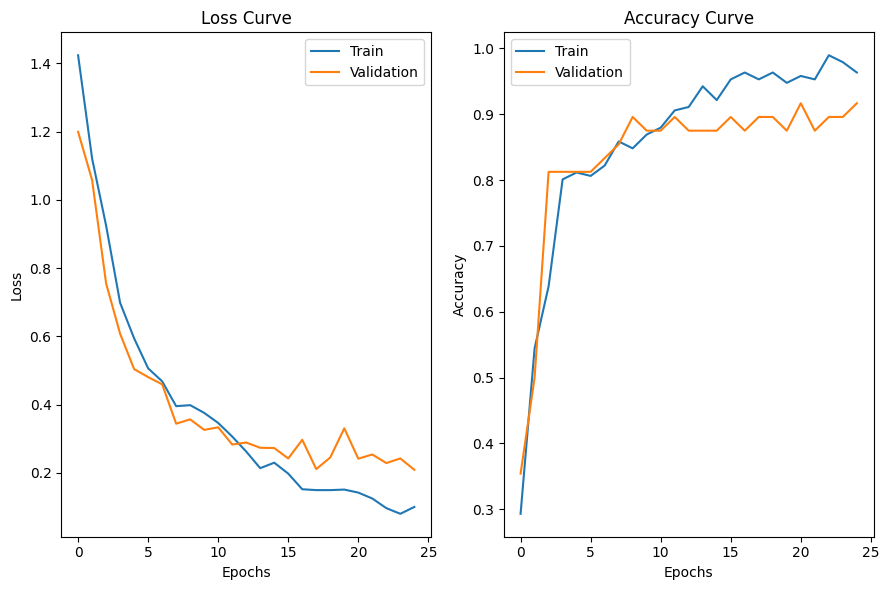

In [14]:
# Plot accuracy and loss for training and validation curves
print('Accuracy and Loss for Baseline Model')
plot_history(history=baseline_history)

In [15]:
# Evaluate baseline model against test data
baseline_model.evaluate(x=X_test, y=y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.6848 - accuracy: 0.8475


[0.6848306059837341, 0.8474576473236084]

### Summary - Baseline Model

- The CNN model trained and evaluated with the standard dataset resulted in an accuracy score of 99% and 0.03 loss after 25 epochs. This can be considered quite good considering the size of the dataset. However, the lower accuracy score (83%) against validation set suggests that the model is over-fitting and therefore cannot be generalized to unseen data.

- Another point to note is that while the standard relationship between accuracy loss is inverse (i.e. increasing accuracy decreases loss) the validation data shows a different behavior where the accuracy plateaus at 83% after 6 epochs but loss continually increases. This suggests that while some images are being correctly predicted, the softmax probability for the wrong prediction are higher thus increasing the overall loss. As the validation accuracy does not increase even though training accuracy is increasing, this is also suggesting that the model is over-fitting to the training data.

- Lastly, the test accuracy score is 85% with loss value of 0.69. This can be considered acceptable for the first iteration but still below the model accuracy during training.

To try and improve the model results and test accuracy, we will perform a second iteration with data augmentation.

## Second iteration - Data Augmentation

In the second iteration, we will perform data augmentation to randomly augment (e.g. flip, rotate, zoom). 
This is to increase possible amount of features that model can pick up during training which might improve it final .performance

In [16]:
# create model
dataAug_model = prep_base_model()

In [17]:
# Initialize image generator object
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
            rotation_range=0.5, # rotate 5 degree
            width_shift_range=0.5, # shift 5%
            height_shift_range=0.5,
            horizontal_flip=True,  # randomly flip images
            vertical_flip=True)

datagen.fit(X_train) # fit training data to image generator

In [18]:
# fit training data to model
batch_size = 18

dataAug_history = dataAug_model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                                    validation_data=(X_val, y_val), epochs=NO_EPOCHS, shuffle=True)

Epoch 1/25
11/11 [==============================] - 1s 23ms/step - loss: 1.5130 - accuracy: 0.2565 - val_loss: 1.2952 - val_accuracy: 0.4375
Epoch 2/25
11/11 [==============================] - 0s 12ms/step - loss: 1.3045 - accuracy: 0.3508 - val_loss: 1.2349 - val_accuracy: 0.6250
Epoch 3/25
11/11 [==============================] - 0s 13ms/step - loss: 1.2648 - accuracy: 0.4241 - val_loss: 1.0776 - val_accuracy: 0.7500
Epoch 4/25
11/11 [==============================] - 0s 13ms/step - loss: 1.1260 - accuracy: 0.6126 - val_loss: 0.8635 - val_accuracy: 0.6458
Epoch 5/25
11/11 [==============================] - 0s 12ms/step - loss: 1.0840 - accuracy: 0.5969 - val_loss: 0.8069 - val_accuracy: 0.6875
Epoch 6/25
11/11 [==============================] - 0s 13ms/step - loss: 0.9097 - accuracy: 0.7068 - val_loss: 0.5828 - val_accuracy: 0.8542
Epoch 7/25
11/11 [==============================] - 0s 13ms/step - loss: 0.8285 - accuracy: 0.7120 - val_loss: 0.5532 - val_accuracy: 0.8333
Epoch 8/25
11

Accuracy and Loss for Data Augmented Model


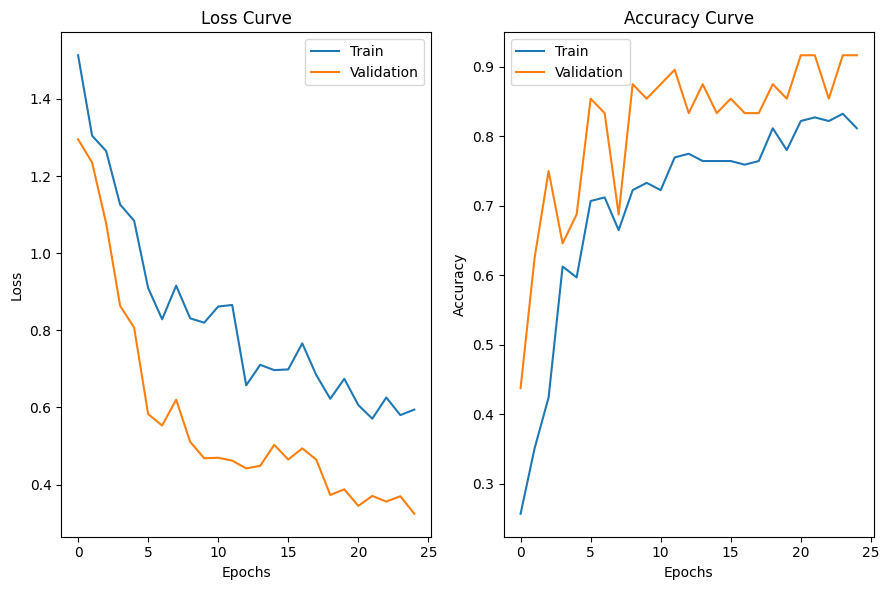

In [19]:
# plot accuracy and loss results for data augmented model

print('Accuracy and Loss for Data Augmented Model')
plot_history(history=dataAug_history)

In [20]:
# Evaluate data augmented model against test data
dataAug_model.evaluate(x=X_test, y=y_test)
# baseline_model.evaluate(x=X_test, y=y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.6043 - accuracy: 0.8644


[0.6043413877487183, 0.8644067645072937]

### Data Augmented Model - Classification report & Confusion matrix

2/2 [==============================] - 0s 4ms/step
--------------- Classification Report --------------
              precision    recall  f1-score   support

       apple       0.86      0.95      0.90        19
      banana       0.84      0.89      0.86        18
      orange       0.89      0.94      0.91        17
       mixed       0.00      0.00      0.00         5

    accuracy                           0.85        59
   macro avg       0.65      0.69      0.67        59
weighted avg       0.79      0.85      0.82        59



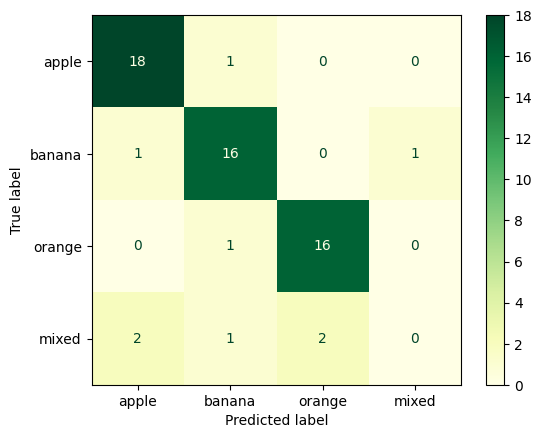

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

y_test_int = [switch_to_int(i) for i in y_test] # convert label array to integer value

baseline_pred = baseline_model.predict(X_test) # get model predictions

baseline_pred_int = [np.argmax(i) for i in baseline_pred] # get max argument position from prediction probabilities

y_test_int = [switch_to_int(i) for i in y_test] # convert label array to integer value

classes = ['apple', 'banana', 'orange', 'mixed']

# plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_true=y_test_int, y_pred=baseline_pred_int, display_labels=classes, cmap='YlGn')

# print classification report
print('--------------- Classification Report --------------')
print(classification_report(y_true=y_test_int, y_pred=baseline_pred_int, target_names=classes, zero_division=0))


### Summary -  Data Augmented Model

- Results from the data augmented (DA) model is overall slightly better than results for the baseline model

- The DA model achieved accuracy of 86% with 0.6 loss on the test data. Comparing this with baseline model results of 85% and 0.73 loss, even though the DA model has the same accuracy as baseline, it achieves a lower loss which shows it is better at not over-fitting to the training set. 

- This is verified by looking at the validation curve which closely follows the curve for training data in both accuracy and loss plots. This shows that the model is able to correctly classify the images on unseen data at the same accuracy as on the training data.

- Looking at the confusion matrix, we can see that the model is poorest at predicting images of mixed fruits. This can be attributed to the lower number of samples of mixed fruit images  in the training dataset.

To further improve the model accuracy in detecting these images, we will focus on resolving class imbalance in the next iteration.

## Third iteration - Resolving class imbalance

As the training dataset has an imbalance in the number of classes, we will resolve this class imbalance and train the model to try and achieve better accuracy

In [23]:
# fetch data to be re-balanced
X_train, y_train = prep_data(TRAIN_DIR)

X = np.reshape(X_train, (239, -1)) # reshape x to be <= 2 dimension

In [25]:
# apply sampling strategy to equalize number of samples
from imblearn.under_sampling import RandomUnderSampler

# create random sampler
sampling_strategy = 'not minority'
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)

# apply sampling strategy
X_rus, y_rus = rus.fit_resample(X=X, y=y_train)

# reshape back to original dimensions
X_rus = reshape(X_rus) 

In [26]:
# convert list of labels to a dictionary
def y_label_dic(y_labels):
    y_train_dic = {}
    for i in range(len(y_labels)):
        if y_labels[i] not in y_train_dic:
            y_train_dic[y_labels[i]] = 1
        else:
            y_train_dic[y_labels[i]] += 1
    return y_train_dic

In [27]:
y_rus_labels = [switch_back(i) for i in y_rus] # convert from OHE to labels
y_train_labels = [switch_back(i) for i in y_train] 

# store in dictionary as count of labels
y_rus_dict = y_label_dic(y_rus_labels)
y_train_dict =  y_label_dic(y_train_labels)

# get labels and sizes for pie plots
rus_pie_labels = list(y_rus_dict.keys())
rus_pie_sizes = list(y_rus_dict.values())
train_pie_labels = list(y_train_dict.keys())
train_pie_sizes = list(y_train_dict.values())

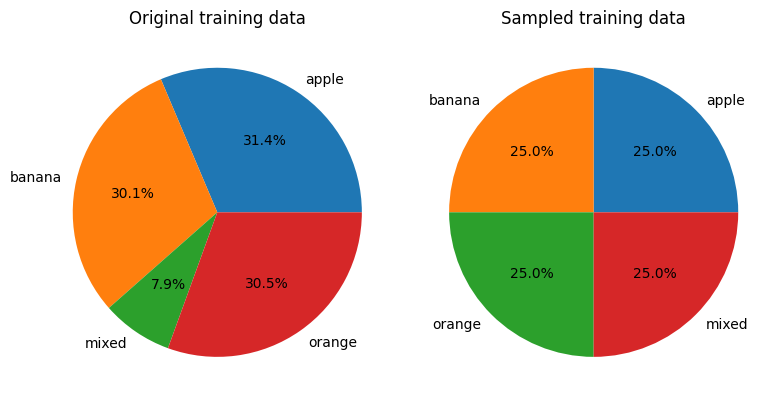

In [28]:
# make pie plot
fig, axs = plt.subplots(ncols=2, figsize=(8, 8))
axs[0].pie(labels=train_pie_labels, x=train_pie_sizes, autopct='%1.1f%%')
axs[0].set_title('Original training data')

axs[1].pie(labels=rus_pie_labels, x=rus_pie_sizes, autopct='%1.1f%%')
axs[1].set_title('Sampled training data')
fig.tight_layout()

plt.show()

In [29]:
# train base model with class balanced training set
X_train, X_val, y_train, y_val = train_test_split(X_rus, y_rus, test_size=0.2, random_state=42)
X_train = X_train/255
X_val = X_val/255

imb_base_model = prep_base_model()

imb_base_history = imb_base_model.fit(x=X_train, y=y_train,
                            validation_data=(X_val, y_val),
                            shuffle=True, epochs=NO_EPOCHS, verbose=VERBOSITY)

Epoch 1/25
2/2 [==============================] - 1s 155ms/step - loss: 1.4242 - accuracy: 0.2500 - val_loss: 1.2639 - val_accuracy: 0.3750
Epoch 2/25
2/2 [==============================] - 0s 38ms/step - loss: 1.3243 - accuracy: 0.4000 - val_loss: 1.2033 - val_accuracy: 0.6250
Epoch 3/25
2/2 [==============================] - 0s 38ms/step - loss: 1.1573 - accuracy: 0.6000 - val_loss: 1.1588 - val_accuracy: 0.5000
Epoch 4/25
2/2 [==============================] - 0s 39ms/step - loss: 1.0871 - accuracy: 0.5333 - val_loss: 1.0570 - val_accuracy: 0.5625
Epoch 5/25
2/2 [==============================] - 0s 37ms/step - loss: 0.9201 - accuracy: 0.7000 - val_loss: 0.9235 - val_accuracy: 0.6250
Epoch 6/25
2/2 [==============================] - 0s 40ms/step - loss: 0.8435 - accuracy: 0.6167 - val_loss: 0.8294 - val_accuracy: 0.6250
Epoch 7/25
2/2 [==============================] - 0s 42ms/step - loss: 0.7639 - accuracy: 0.7500 - val_loss: 0.8310 - val_accuracy: 0.6875
Epoch 8/25
2/2 [==========

In [30]:
# train image augmented model with class balanced training set
X_train, X_val, y_train, y_val = train_test_split(X_rus, y_rus, test_size=0.2, random_state=42)
X_train = X_train/255
X_val = X_val/255

imb_dataAug_model = prep_base_model()

imb_datagen = ImageDataGenerator(
            rotation_range=0.5, # rotate 5 degree
            width_shift_range=0.5, # shift 5%
            height_shift_range=0.5,
            horizontal_flip=True,  # randomly flip images
            vertical_flip=True)

imb_datagen.fit(X_train) # fit training data to image generator

imb_dataAug_history = imb_dataAug_model.fit(imb_datagen.flow(X_train, y_train, batch_size=batch_size),
                                    validation_data=(X_val, y_val), epochs=NO_EPOCHS, shuffle=True)

Epoch 1/25
4/4 [==============================] - 1s 57ms/step - loss: 1.6827 - accuracy: 0.2333 - val_loss: 1.3993 - val_accuracy: 0.2500
Epoch 2/25
4/4 [==============================] - 0s 17ms/step - loss: 1.4313 - accuracy: 0.2333 - val_loss: 1.3246 - val_accuracy: 0.4375
Epoch 3/25
4/4 [==============================] - 0s 19ms/step - loss: 1.3650 - accuracy: 0.2333 - val_loss: 1.2867 - val_accuracy: 0.5000
Epoch 4/25
4/4 [==============================] - 0s 19ms/step - loss: 1.3122 - accuracy: 0.4500 - val_loss: 1.2561 - val_accuracy: 0.3125
Epoch 5/25
4/4 [==============================] - 0s 19ms/step - loss: 1.2946 - accuracy: 0.4833 - val_loss: 1.2296 - val_accuracy: 0.3750
Epoch 6/25
4/4 [==============================] - 0s 20ms/step - loss: 1.2928 - accuracy: 0.3500 - val_loss: 1.1950 - val_accuracy: 0.4375
Epoch 7/25
4/4 [==============================] - 0s 18ms/step - loss: 1.2760 - accuracy: 0.3167 - val_loss: 1.2616 - val_accuracy: 0.3750
Epoch 8/25
4/4 [===========

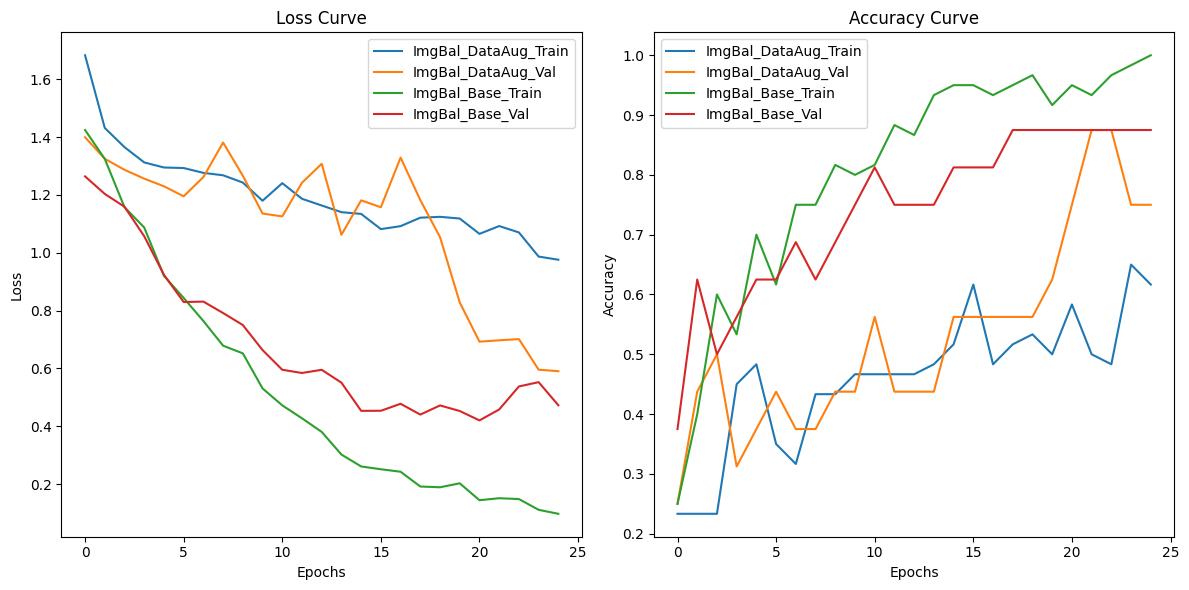

In [31]:
# plot the history for both image balanced models

legend = ['ImgBal_DataAug_Train', 'ImgBal_DataAug_Val', 'ImgBal_Base_Train', 'ImgBal_Base_Val']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].plot(imb_dataAug_history.history['loss'])
ax[0].plot(imb_dataAug_history.history['val_loss'])
ax[0].plot(imb_base_history.history['loss'])
ax[0].plot(imb_base_history.history['val_loss'])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Curve')
ax[0].legend(legend)

ax[1].plot(imb_dataAug_history.history['accuracy'])
ax[1].plot(imb_dataAug_history.history['val_accuracy'])
ax[1].plot(imb_base_history.history['accuracy'])
ax[1].plot(imb_base_history.history['val_accuracy'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy Curve')
ax[1].legend(legend)

fig.tight_layout()
plt.show()    

In [32]:
X_test, y_test = prep_data(TEST_DIR)
X_test = X_test/255

print('Base model with Class Balanced data')
imb_base_model.evaluate(x=X_test, y=y_test)

print('Base model with Class Balanced and Augmented data')
imb_dataAug_model.evaluate(x=X_test, y=y_test)

Base model with Class Balanced data
2/2 [==============================] - 0s 4ms/step - loss: 0.7873 - accuracy: 0.7119
Base model with Class Balanced and Augmented data
2/2 [==============================] - 0s 5ms/step - loss: 1.0198 - accuracy: 0.6610


[1.019762635231018, 0.6610169410705566]

### Summary - Class Balanced model

## Overall Summary

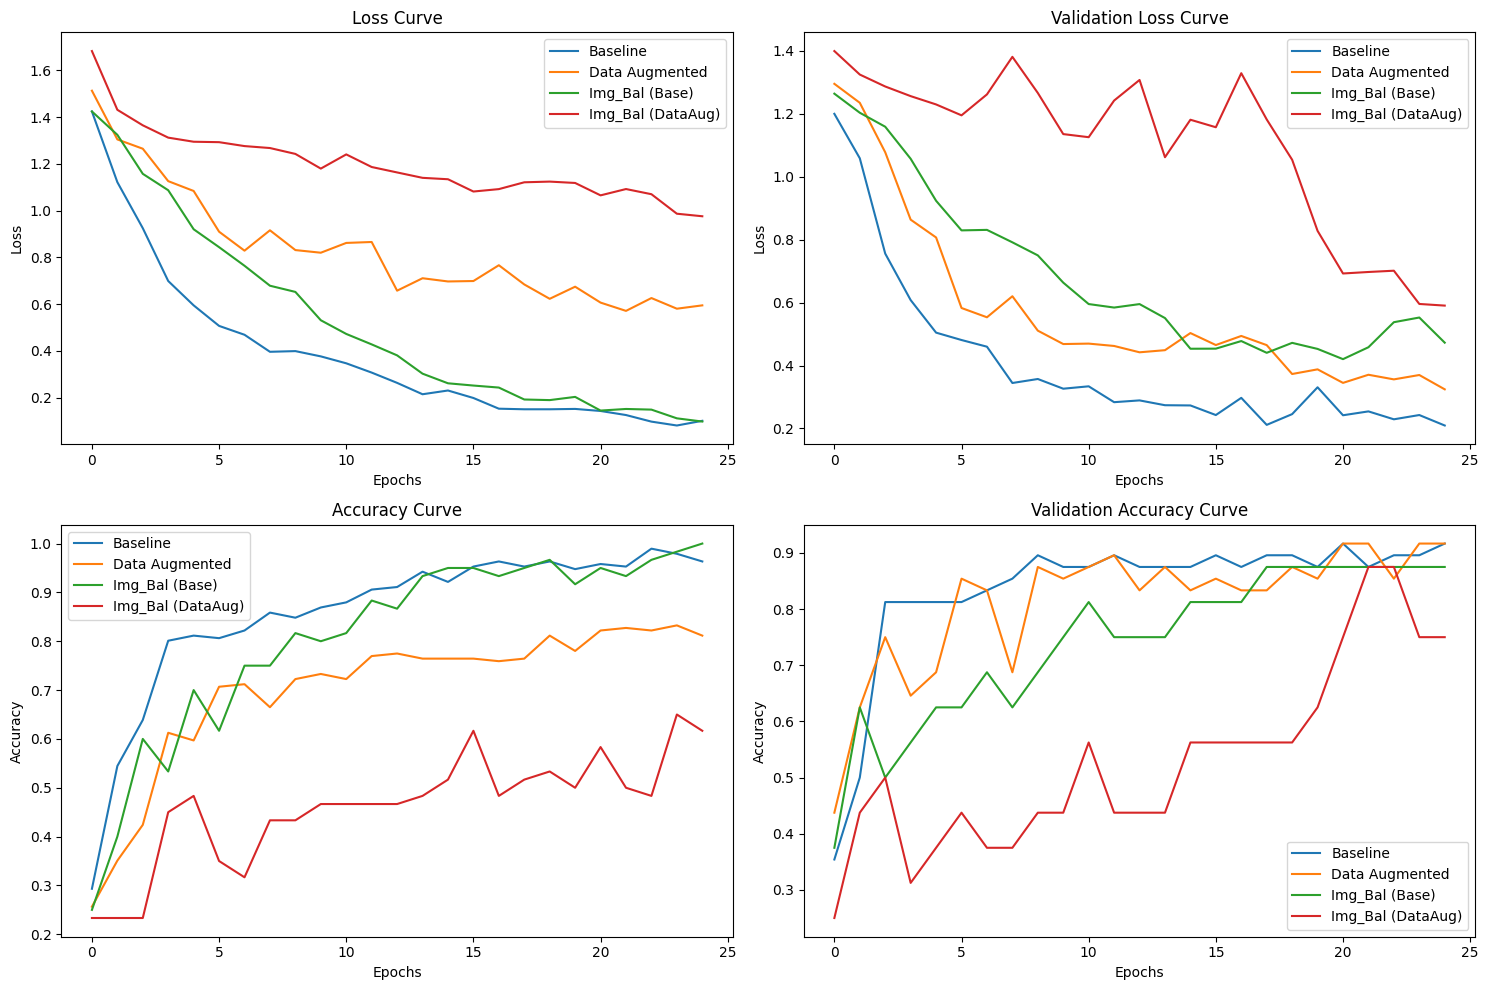

In [33]:
# plot the accuracy and loss for all models

baseline_hist = baseline_history.history
dataAug_hist = dataAug_history.history
imb_base_hist = imb_base_history.history
imb_dataAug_hist = imb_dataAug_history.history

legends = ['Baseline','Data Augmented', 'Img_Bal (Base)', 'Img_Bal (DataAug)']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# training loss
ax[0,0].plot(baseline_hist['loss'])
ax[0,0].plot(dataAug_hist['loss'])
ax[0,0].plot(imb_base_hist['loss'])
ax[0,0].plot(imb_dataAug_hist['loss'])
ax[0,0].set_xlabel('Epochs')
ax[0,0].set_ylabel('Loss')
ax[0,0].set_title('Loss Curve')
ax[0,0].legend(legends)

# validation loss
ax[0,1].plot(baseline_hist['val_loss'])
ax[0,1].plot(dataAug_hist['val_loss'])
ax[0,1].plot(imb_base_hist['val_loss'])
ax[0,1].plot(imb_dataAug_hist['val_loss'])
ax[0,1].set_xlabel('Epochs')
ax[0,1].set_ylabel('Loss')
ax[0,1].set_title('Validation Loss Curve')
ax[0,1].legend(legends)

# accuracy
ax[1,0].plot(baseline_hist['accuracy'])
ax[1,0].plot(dataAug_hist['accuracy'])
ax[1,0].plot(imb_base_hist['accuracy'])
ax[1,0].plot(imb_dataAug_hist['accuracy'])
ax[1,0].set_xlabel('Epochs')
ax[1,0].set_ylabel('Accuracy')
ax[1,0].set_title('Accuracy Curve')
ax[1,0].legend(legends)

# validation accuracy
ax[1,1].plot(baseline_hist['val_accuracy'])
ax[1,1].plot(dataAug_hist['val_accuracy'])
ax[1,1].plot(imb_base_hist['val_accuracy'])
ax[1,1].plot(imb_dataAug_hist['val_accuracy'])
ax[1,1].set_xlabel('Epochs')
ax[1,1].set_ylabel('Accuracy')
ax[1,1].set_title('Validation Accuracy Curve')
ax[1,1].legend(legends)

fig.tight_layout()
plt.show()   